# Машинное обучение, ФКН ВШЭ

# Семинар 11. Графы вычислений

## Backpropagation
(метод обратного распространения ошибки)

Backpropagation - просто метод вычисления градиентов, он не нарушает законов математики и не использует инновационных технологий, он просто позволяет аккуратно вычислять производные. 

Рассмотрим следующую нейросеть

<img src="images/backprop.jpg">

Это просто функция от объекта $x$ из нашей выборки, которая представляется композицией элементарных функций $f_{*}$. И мы хотим научиться вычислять градиенты этой функции по её параметрам $w$.

### Скалярный случай

Для начала рассмотрим случай, когда все величины являются скалярами. Он очень просто обобщается на случай векторных величин.

Обозначим $x_1 = f_1(x,w_1), \; x_2 = f_2(x_1,w_2)\ldots, \hat{y} = f_n(x_{n-1},w_n)$.

Посчитаем производную по $w_n$ для последнего слоя.

$$L(\hat{y}, y) = L\bigg(f_n(x_{n-1},w_n), y\bigg)$$

$$\frac{\partial}{\partial w_n} L\bigg(f_n(x_{n-1},w_n), y\bigg) = \frac{\partial}{\partial \hat{y}} L(\hat{y}, y) \cdot \frac{\partial}{\partial w_n} f_n(x_{n-1},w_n)$$

Видим, что мы можем вычислить производную, используя знания только о последнем слое!   
Аналогичным образом можем посчитать производную по $x_{n-1}$. Вдруг она нам пригодится.

$$\frac{\partial}{\partial x_{n-1}} L\bigg(f_n(x_{n-1},w_n), y\bigg) = \frac{\partial}{\partial \hat{y}} L(\hat{y}, y) \cdot \frac{\partial}{\partial x_{n-1}} f_n(x_{n-1},w_n)$$

Попробуем сделать то же самое для предпоследнего слоя

$$L(\hat{y}, y) = L\bigg(f_n(f_{n-1}(x_{n-2}, w_{n-1}),w_n), y\bigg)$$

$$\frac{\partial}{\partial w_{n-1}} L\bigg(f_n(f_{n-1}(x_{n-2}, w_{n-1}),w_n), y\bigg) = \frac{\partial}{\partial \hat{y}} L(\hat{y}, y) \cdot \frac{\partial}{\partial x_{n-1}} f_n(x_{n-1},w_n) \cdot \frac{\partial}{\partial w_{n-1}} f_{n-1}(x_{n-2}, w_{n-1})$$

Заметим, что, расчитанная выше, производная по $x_{n-1}$ нам всё таки пригодилась

$$\frac{\partial}{\partial w_{n-1}} L\bigg(f_n(f_{n-1}(x_{n-2}, w_{n-1}),w_n), y\bigg) = \frac{\partial}{\partial x_{n-1}} L\bigg(f_n(x_{n-1},w_n), y\bigg) \cdot \frac{\partial}{\partial w_{n-1}} f_{n-1}(x_{n-2}, w_{n-1})$$

То же самое можем сделать для производной по $x_{n-2}$

$$\frac{\partial}{\partial x_{n-2}} L\bigg(f_n(f_{n-1}(x_{n-2}, w_{n-1}),w_n), y\bigg) = \frac{\partial}{\partial x_{n-1}} L\bigg(f_n(x_{n-1},w_n), y\bigg) \cdot \frac{\partial}{\partial x_{n-2}} f_{n-1}(x_{n-2}, w_{n-1})$$

Как видим, мы можем вычислять производные по весам нашей фунции, используя знания только о текущем слое и производных для слоёв с бОльшим индексом. Выпишем формулу для произвольного $i$-го слоя.

Для $i$-го слоя мы знаем:
- $f_i$ - функция нашего слоя,
- $\partial L /\partial x_i$ - производная по выходу $i$-го слоя, т.к. её мы вычислили ранее для слоя $i+1$.

Тогда мы можем записать следующие формулы

$$\frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial x_i} \frac{\partial f_i(x_{i-1}, w_i)}{\partial w_i}$$

$$\frac{\partial L}{\partial x_{i-1}} = \frac{\partial L}{\partial x_i} \frac{\partial f_i(x_{i-1}, w_i)}{\partial x_{i-1}}$$

Производную по весу $w_i$ мы используем для обновления наших весов градиентным спуском, а производную по входам $x_{i-1}$ передаём на слой $i-1$.

### Векторный случай

При переходе к векторным величинам, в предыдущих рассуждениях поменяется только формула производной сложной функции.

Пусть $x\in \mathbb{R}^n, y \in \mathbb{R}^m, z\in \mathbb{R}$, и заданы функции

$$
z=g(f(x)), \quad y = f(x).
$$

Легко показать, что 

$$
\nabla_x g = \bigg(\frac{dy}{dx}\bigg)^T \nabla_y g,
$$

где $\frac{dy}{dx}$ – якобиан:

$$
\frac{dy}{dx} = 
\begin{bmatrix}
    \frac{\partial y_1}{\partial x_1}      & \frac{\partial y_1}{\partial x_2} & \dots & \frac{\partial y_1}{\partial x_n} \\
    \frac{\partial y_2}{\partial x_1}      & \frac{\partial y_2}{\partial x_2} & \dots & \frac{\partial y_2}{\partial x_n} \\
    \dots \\
    \frac{\partial y_m}{\partial x_1}  & \frac{\partial y_m}{\partial x_2} & \dots & \frac{\partial y_m}{\partial x_n} \\
\end{bmatrix}.
$$

Теперь рассмотрим некоторый слой и выпишем для него формулы.

<img src="images/backprop_layer.png">

Необходимые нам формулы:

$$\frac{\partial L}{\partial w} = \bigg(\frac{dy}{dw}\bigg)^T \frac{\partial L}{\partial y},$$

$$\frac{\partial L}{\partial x} = \bigg(\frac{dy}{dx}\bigg)^T \frac{\partial L}{\partial y}.$$

Здесь $\frac{dy}{dx}$ и $\frac{dy}{dw}$ соответствующие якобианы, а $\frac{\partial L}{\partial y} = \nabla_y L$, $\frac{\partial L}{\partial x} = \nabla_x L$, $\frac{\partial L}{\partial w} = \nabla_w L$ - градиенты.

Далее, мы можем повторить все рассуждения, но уже для векторов. Возникает вопрос — что делать с более сложными структурами весов? Ведь в общем случае мы представляем параметры и выходы очередного слоя в виде тензоров. На самом деле, запись в виде тензора используется для более удобного представления формул, мы, в свою очередь, можем векторизовать все наши формулы и использовать формулу сложной производной для векторов.

### Dense layer (Fully-Connected layer)
(полносвязный слой)

Теперь, когда мы знаем как вычислять градиенты по параметрам нашей функции, рассмотрим какими элементарными функциями пользуются для построения алгоритмов.

Полносвязный слой представляет собой домножение на матрицу и добавление сдвигов

$$f_{i}(x_{i-1}, w_{i}) = W_{i}x_{i-1} + b_{i},$$

здесь $w_{i} = (W_{i}, b_{i})$.

Название этого слоя произошло от следующей картинки

<img src="images/FCLayer.png">

На картинке слева входной вектор $x_{i-1}$, справа выходной вектор $W_{i}x_{i-1}$, толщина линий соответствует весам в матрице $W_{i}$.

### Nonlinearities

Посмотрим что будет на выходе двух подряд идущих полносвязных слоёв.

$$f_{i}(x_{i-1}, w_{i}) = W_{i}f_{i-1}(x_{i-2}, w_{i-1}) + b_{i} = W_{i}(W_{i-1}x_{i-2} + b_{i-1}) + b_{i} = Ax_{i-2} + \beta,$$

где $A = W_{i}W_{i-1}, \; \beta = W_{i}b_{i-1}+b_{i}$. Получается, что композицию двух полносвязных слоёв можно представить одним полносвязным слоем.

Этот факт вызывает некоторые трудности – если мы будем использовать только полносвязные слои, то ничего, сложнее линейной модели, мы не сможем построить.

Поэтому мы хотим ввести нелинейности, чтобы обогатить семейство элементарных функций. Выпишем некоторые из них:
- **ReLU** (Rectified Linear Unit) $$f(x) = max(0,x)$$
- **Leaky ReLU** $$f(x) = max(\alpha x,x), \; \alpha < 0.5$$
- **sigmoid** $$f(x) = \frac{1}{1+\exp(-x)}$$
- **tanh** $$f(x)=\frac{2}{1+\exp(-2x)}-1$$

**Задача.** В качестве самостоятельного упражнения, исследуйте качество нейросети в зависимости от используемых нелинейностей. Для этого необходимо выбрать датасет, зафиксировать архитектуру сети, и провести несколько экспериментов с различными нелинейностями.

## Convolutional layer
(свёрточный слой)

Свёрточные слои – одна из самых важных компонент нейросети при работе с изображениями. Для того чтобы понять как устроены свёрточные слои сначала разберёмся что такое операция свёртки и как она применяется к картинкам.

### Операция свёртки

В свёртке участвуют две функции:
- $f(x)$ – исходная функция, или фильтруемая;
- $g(x)$ – фильтр, или фильтрующая функция.

Сначала рассмотрим одномерную свёртку для обычных функций

$$(f * g)(t) = \int_{-\infty}^{+\infty}f(x)g(-x+t)dx$$

Что происходит в этой формуле? Мы оставляем исходную функцию $f(x)$ без изменений, а вот функцию $g(x)$ мы инвертируем относительно аргумента, сдвигаем на параметр $t$, а потом считаем площадь под произведением получившихся функций. Для одномерного случая есть неплохая визуализация

<img src="images/Convolution_of_box_signal_with_itself2.gif">

Давайте перейдём в двумерный дискретный случай, чтобы адаптировать это определение для картинок. 

У нас есть две матрицы $F,G$ – это наши двумерные дискретные функции, и мы двигая матрицы в пространстве хотим посчитать сумму их произведений, точно так же, как в непрерывном одномерном случае. Далее можно написать громоздкую формулу, но лучше посмотреть гифку

<img src="images/numerical_no_padding_no_strides.gif">

Важный момент! Вы должны были заметить, что мы не инвертируем матрицу $G$, как делали в одномерном случае с функцией $g(x)$. И у этого момента есть некоторая история. В "классическом" Computer Vision, для операции свёртки, во всех фильтрах инвертировали строки и столбцы, таким образом, мы перемножали левый нижний элемент матрицы $G$ с правым верхним элементом под матрицей $G$. И это действительно является каноническим определением операции свёртки. Но распространение нейросетей изменило наш лексикон. Дело в том, что в нейросетях абсолютно неважно инвертируем ли мы строки и столбцы, или же нет, поэтому, для сокращения времени выполнения операции, инвертирование не делают. Поэтому сейчас, когда говорят о нейросетях, под свёрткой подразумевают свёртку без инвертирования, но когда речь заходит о "классическом" Computer Vision, то подразумевают каноническое определение свёртки, т.е. с инвертированием. Будьте внимательны!

Чтобы закрыть тему свёртки для картинок, поясним момент с размером изображения. Вы могли заметить, что размер конечного изображения уменьшается по сравнению с исходным. Но в некоторых ситуациях мы не хотим чтобы размер конечного изображения отличался. Чтобы избежать уменьшения размеров, исходное изображение дополняют нулями по краям (но это, разумеется, не единственый способ борьбы с этой проблемой). Заметьте, что кол-во нулей зависит от размера фильтра!

<img src="images/same_padding_no_strides.gif">

### Примеры различных фильтров

#### Фильтр Собеля

Фильтр, который считает производную в каждой точке нашего изображения. Чтобы понять как устроен фильтр, рассмотрим фильтр, который берёт производную в одномерном случае

$$
\text{diff} = 
\begin{bmatrix}
 -1 & 0 & 1 \\
\end{bmatrix},
$$

такой фильтр приближает производную попарными разностями

$$\frac{\partial f}{\partial x}\bigg|_{x=x_i} =  f(x_{i+1}) - f(x_{i-1}).$$

Теперь посмотрим на устройство фильтра Собеля.

$$
G_x = 
\begin{bmatrix}
 -1 & 0 & 1 \\
 -2 & 0 & 2 \\
 -1 & 0 & 1 \\
\end{bmatrix} * A, \quad
G_y = 
\begin{bmatrix}
 -1 & -2 & -1 \\
 0 & 0 & 0 \\
 1 & 2 & 1 \\
\end{bmatrix} * A,
$$

здесь $A$ – фильтруемое изображение. Сначала отфильтруем наше изображение двумя разными фильтрами – один отвечает за производную по $x$, другой за производную по $y$. В обоих случаях мы дополнительно считаем производные в соседних пикселях и усредняем их с весами. После того, как мы знаем проекции производной на каждую из осей, можем рассчитать результирующую производную по евклидовой метрике

$$
G = \sqrt{G_x^2 + G_y^2},
$$

здесь возведение в степень и квадратный корень – поэлементные операции. 

Обратите внимание, что фильтр Собеля не симметричен, т.к. зависит от того, какое направление по $x$ и по $y$ мы считаем положительным. В данном примере мы считали, что $x$ увеличивается слева направо, а $y$ сверху вниз.

#### Фильтр Лапласа
(дискретный оператор лапласа)

Аналогично фильтру Собеля, рассмотрим сначала одномерный случай. Рассмотрим немного другой фильтр для первой произодной

$$
\text{diff} = 
\begin{bmatrix}
 -1 & 1 \\
\end{bmatrix}.
$$

Формально применим этот фильтр два раза

$$\frac{\partial^2 f}{(\partial x)^2}\bigg|_{x=x_i} =  \frac{\partial f}{\partial x}\bigg|_{x=x_{i+1}} - \frac{\partial f}{\partial x}\bigg|_{x=x_{i}} = f(x_{i+2}) - f(x_{i+1}) - (f(x_{i+1}) - f(x_{i})) = f(x_{i+2}) - 2f(x_{i+1}) + f(x_{i}).$$

Получается, что дискретный аналог второй производной это следующий фильтр

$$
\frac{\partial^2 f}{(\partial x)^2} \sim 
\begin{bmatrix}
 1 & -2 & 1 \\
\end{bmatrix}.
$$

Теперь вспомним определение оператора Лапласа

$$\Delta = \sum_{i} \frac{\partial^2 f}{(\partial x_i)^2}.$$

Нам необходимо взять вторую производную по всем направлениям и сложить получившиеся значения, это делает следующая матрица

$$
G = 
\begin{bmatrix}
 0 & 1 & 0 \\
 1 & -4 & 1 \\
 0 & 1 & 0 \\
\end{bmatrix}.
$$

#### Гауссовский фильтр

Идея этого вильтра заключается в том, чтобы сгладить все значения в некоторой локальной окрестности, тем самым "размыть" изображение. Соответственно, мы хотим взвесить все наши пиксели в фильтре, при этом вес будет тем больше, чем ближе рассматриваемый пиксель к центру фильтра. Удобнее всего этот фильтр воспринимать как функцию на плоскости.

<img style="height:400px" src="images/gaussiankernel.jpg">

Также у этого фильтра есть параметры, помимо размера самой матрицы, мы можем выбирать значение дисперсии нормального распределения.

Посмотрим как работают, описанные выше, фильтры.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import ndimage

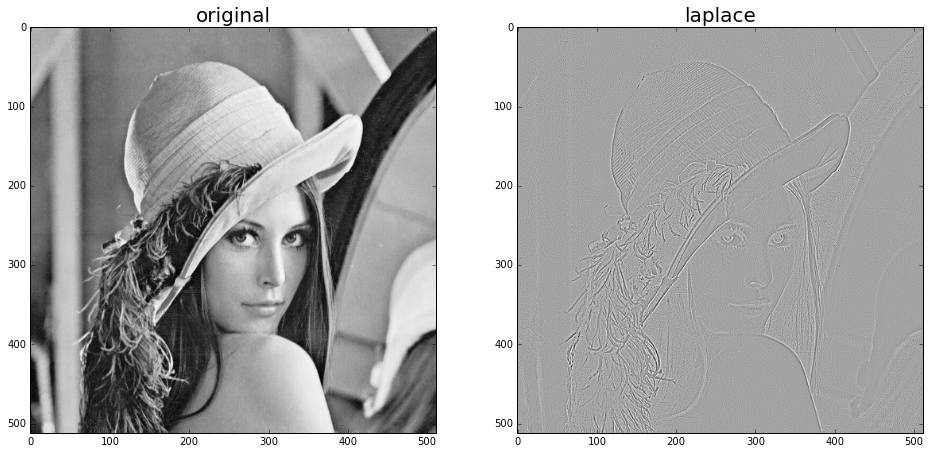

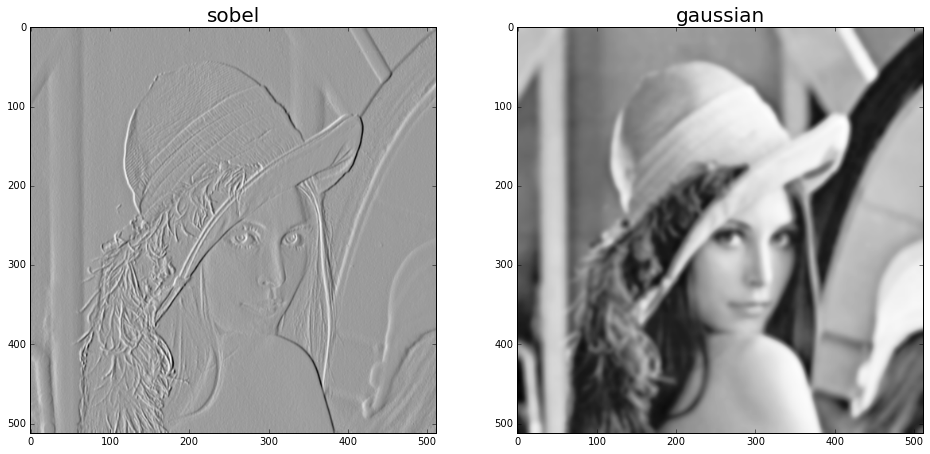

In [3]:
gad = plt.imread('images/Lenna.png')
gad = np.mean(gad,axis=2)

figsize(16,8)
plt.subplot(121)
plt.imshow(gad, cmap='Greys_r')
plt.title('original', fontsize=20)
plt.subplot(122)
plt.imshow(ndimage.laplace(gad), cmap='Greys_r')
plt.title('laplace', fontsize=20)
plt.show()
plt.subplot(121)
plt.imshow(ndimage.sobel(gad), cmap='Greys_r')
plt.title('sobel', fontsize=20)
plt.subplot(122)
plt.imshow(ndimage.gaussian_filter(gad, sigma=3), cmap='Greys_r')
_ = plt.title('gaussian', fontsize=20)

### Convolutional layer

Определение двумерной свёртки для серых картинок легко обобщается на случай, когда каждому пикселю соответствует не одно значение, а целый вектор. 

В общем случае, на вход свёрточному слою подаётся трёхмерный тензор размера $H\times W\times D$, где первые два измерения соответствуют координатам пикселей, а третье измерение соответствует признаковому описанию пикселей. Фильтр тоже является трёхмерным тензором размера $h\times w\times D$. Обратите внимание, что третья размерность фильтра и входного тензора совпадает.

<img src="images/conv.png">

Свёртка происходит аналогичным образом, мы накладываем фильтр на тензор, считаем сумму произведения пикселей с весами, при этом двигать фильтр мы, как и раньше, можем только по координатам пикселей. На выходе такой свёртки мы получаем матрицу.

Свёрточный слой обычно имеет несколько фильтров, веса которых, являются параметрами нашего алгоритма. Сворачивая исходный тензор размера  $H\times W\times D$ с $D'$ фильтрами размера $h\times w\times D$, мы получаем результирующий тензор рамера $(H - h + 1)\times(W - w + 1)\times D'$. Таким образом, свёрточный слой задаётся параметрами $h,w$ и количеством фильтров $D'$. Также, после свёртки, к каждому фильтру добавляется сдвиг $b_d$ ($d$ – индекс фильтра), который тоже обучается.

## Convolutional Neural Network (CNN)

- Архитектура с кучей свёрточных слоёв.
- Обычно используется для картинок, но есть и другие случаи – [char-CNN](https://arxiv.org/pdf/1508.06615v4.pdf).

### [ImageNet](http://image-net.org/) dataset

Успех и популярность свёрточных сетей обусловлен многими факторами, и один из них это появление в 2010 году базы картинок ImageNet, в которой содержится около $1.2$ миллиона картинок, размеченных на $1000$ различных классов.

**Метрика качества**   
Алгоритм должен выдать $5$ классов $l_j, \; j=1,\ldots,5$, для каждой картинки, также у нас есть истинные классы, которые на ней присутствуют  $g_k, \; k=1,\ldots,n$, где $n$ - кол-во классов на данной картинке. Тогда ошибка на одной картинке это 

$$e = \frac{1}{n}\sum_k \min_{j}d(l_j,g_k),$$

где $d(x,y) = 0$, при $x=y$ и $d(x,y) = 1$ в остальных случаях.

Идея такого подсчёта заключается в том, чтобы не штрафовать "более умный" алгоритм, который может обнаружить объекты, которые на картинке есть, но не размечены.

### [VGG19](https://arxiv.org/pdf/1409.1556.pdf)

- Сеть Оксфорского производства. 
- Выбивает какие-то крутые метрики на ImageNet.
- Имеет 19 слоёв.
- Нет красивой картинки архитектуры (надо сделать).
- Мы будем её использовать чтобы отличить котиков от собачек.

## Tensorflow

### Базовый синтаксис

In [6]:
import tensorflow as tf

Рассмотрим простой пример использования tensorflow – умножим матрицу на вектор

Строим вычислительный граф

In [8]:
x = tf.placeholder(dtype=tf.float32, shape=[3,1])
W = tf.placeholder(dtype=tf.float32, shape=[3,3])
multiplication = tf.matmul(W,x)
init = tf.initialize_all_variables()

Вычисляем наш граф в сессии

In [13]:
with tf.Session() as sess:
    sess.run(init)
    input_x = np.ones(3).reshape([3,1])
    input_W = np.arange(9).reshape([3,3])
    print input_x
    print input_W
    print sess.run(multiplication, {
            x:input_x,
            W:input_W
        })

[[ 1.]
 [ 1.]
 [ 1.]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[  3.]
 [ 12.]
 [ 21.]]


Пусть теперь мы хотим задать матрицу $W$ один раз и больше её не трогать

Построим вычислительный граф

In [17]:
tf.reset_default_graph()
x = tf.placeholder(dtype=tf.float32, shape=[3,1])
W = tf.get_variable('W', [3,3], initializer=tf.constant_initializer(0.0), dtype=tf.float32)
assign_op = W.assign(input_W)
multiplication = tf.matmul(W,x)
init = tf.initialize_all_variables()

Заметьте, что добавилась операция присваивания, но это только операция в графе, т.е. если мы не выполним её в сессии, то матрица $W$ останется нулевой.

Проверим это

In [18]:
with tf.Session() as sess:
    sess.run(init)
    input_x = np.ones(3).reshape([3,1])
    print input_x
    print input_W
    print sess.run(multiplication, {
            x:input_x
        })

[[ 1.]
 [ 1.]
 [ 1.]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0.]
 [ 0.]
 [ 0.]]


Теперь выполним эту операцию и убедимся, что матрица $W$ приняла нужное нам значение.

In [19]:
with tf.Session() as sess:
    sess.run(init)
    sess.run(assign_op)
    input_x = np.ones(3).reshape([3,1])
    print input_x
    print input_W
    print sess.run(multiplication, {
            x:input_x
        })

[[ 1.]
 [ 1.]
 [ 1.]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[  3.]
 [ 12.]
 [ 21.]]


### Вычисление градиента

Основная идея использования вычислительных графов это автоматическое вычисление градиентов.

Посмотрим как это работает - вычислим производную потенциала Леннард-Джонса

In [36]:
tf.reset_default_graph()
r = tf.placeholder(dtype=tf.float32, shape=1)
depth = 1.0
sigma = 1.0
U = 4*depth*((sigma/r)**12 - (sigma/r)**6)
grad_U = tf.gradients(U, r)
init = tf.initialize_all_variables()

In [40]:
with tf.Session() as sess:
    sess.run(init)
    r_axis = np.arange(0.98, 2.01, 0.01)
    U_axis = []
    grad_axis = []
    for r_point in r_axis:
        U_axis.append(sess.run(U, {r:[r_point]}))
        grad_axis.append(sess.run(grad_U, {r:[r_point]})[0])

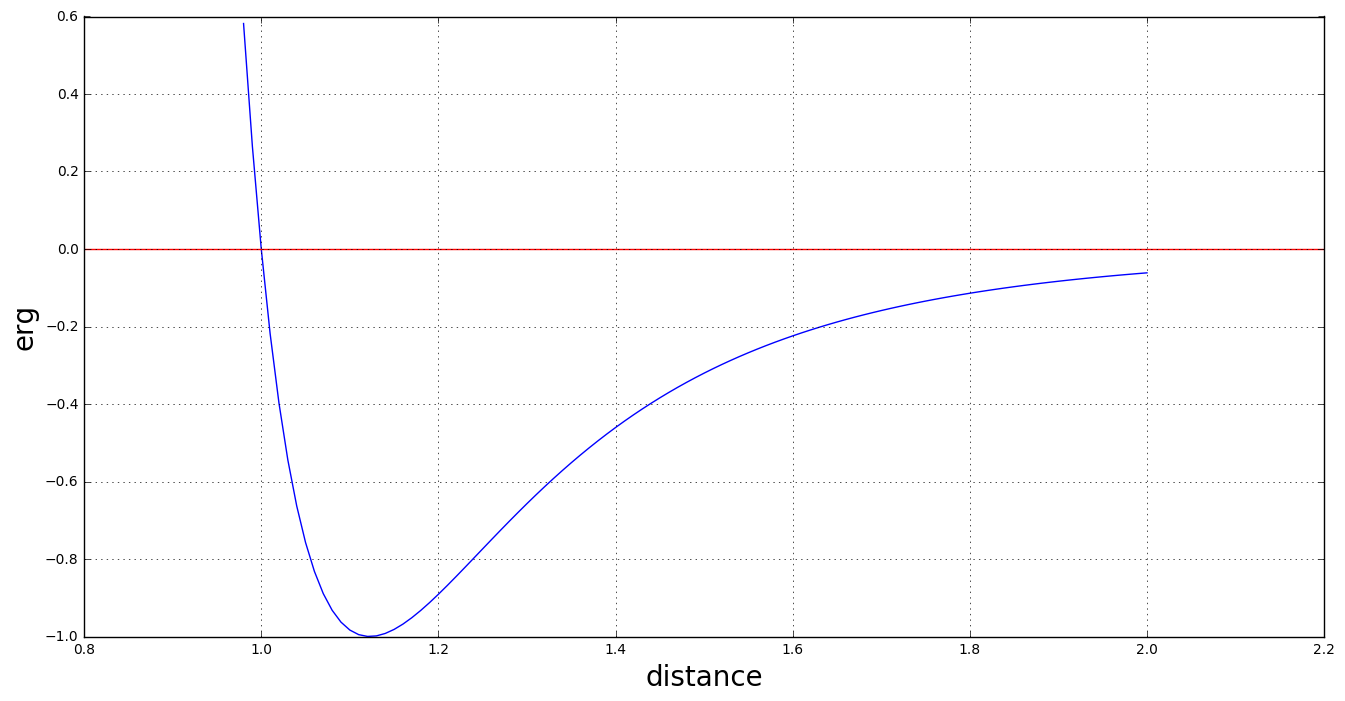

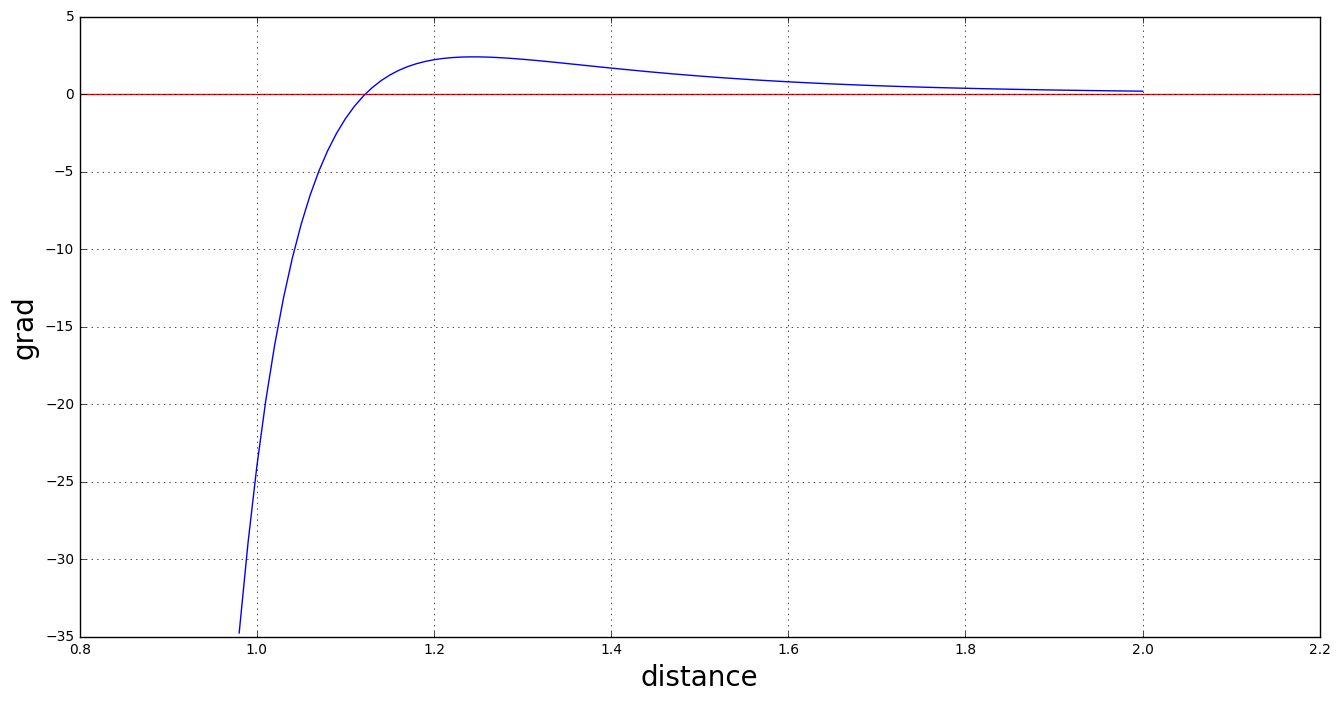

In [43]:
plt.plot(r_axis, U_axis)
plt.axhline(0.0, c='r')
plt.xlabel('distance', fontsize=20)
plt.ylabel('erg', fontsize=20)
plt.grid()
plt.show()

plt.plot(r_axis, grad_axis)
plt.axhline(0.0, c='r')
plt.xlabel('distance', fontsize=20)
plt.ylabel('grad', fontsize=20)
plt.grid()

### Классификация "котиков и собачек"

<img src='images/Cats-Dogs-2001-Tamil-Dubbed-Movie-HD-720p-Watch-Online-1.jpg'>

Идея следующая – сделаем признаковое описание для каждой картинки с помощью VGG19. Будем пропускать картинку через свёрточную сеть пока не получим достатчно маленькое представление, а потом будем использовать это представление в качестве признаков для обучения нашего алгоритма.


Для классификации изображений "котиков и собачек" нам потребуются сами котики и собачки. Скачаем их. 

In [4]:
!ls

pics  sem_11.ipynb  VGG19.py  VGG19.pyc


In [5]:
!wget https://www.dropbox.com/s/d61lupw909hc785/dogs_vs_cats.train.zip?dl=1 -O data.zip
!unzip data.zip > /dev/null

--2016-11-22 00:46:28--  https://www.dropbox.com/s/d61lupw909hc785/dogs_vs_cats.train.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 64:ff9b::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|64:ff9b::a27d:5001|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/VQZ2NlR4E9FBveT5WiNPjHZNiiyyipSKNm5KqE0QzuTdWpAN6Kg9jvAIPriUiNVE/file?dl=1 [following]
--2016-11-22 00:46:30--  https://dl.dropboxusercontent.com/content_link/VQZ2NlR4E9FBveT5WiNPjHZNiiyyipSKNm5KqE0QzuTdWpAN6Kg9jvAIPriUiNVE/file?dl=1
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 64:ff9b::2d3a:4525
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|64:ff9b::2d3a:4525|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569546721 (543M) [application/zip]
Saving to: ‘data.zip’

100%[======================================>] 569,546,721 3.70MB/s   in 10m 15s

2016-11-22 00:56:47 (904 K

In [44]:
!ls

data.zip  pics	sem_11.ipynb  train  VGG19.py  VGG19.pyc


In [46]:
!ls train | wc -l

25000


In [47]:
!ls train 2> /dev/null | grep cat 2> /dev/null | head -n 10
!ls train | grep cat | wc -l

cat.0.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg
12500


In [48]:
!ls train 2> /dev/null | grep dog 2> /dev/null | head -n 10
!ls train | grep dog | wc -l

dog.0.jpg
dog.10000.jpg
dog.10001.jpg
dog.10002.jpg
dog.10003.jpg
dog.10004.jpg
dog.10005.jpg
dog.10006.jpg
dog.10007.jpg
dog.10008.jpg
12500


In [49]:
import os

import numpy as np
import skimage.transform

In [50]:
filenames = os.listdir('train')
filenames = map(lambda name: os.path.join('train', name), filenames)
dog_files = filter(lambda name: 'dog' in name, filenames)
cat_files = filter(lambda name: 'cat' in name, filenames)

### Котики

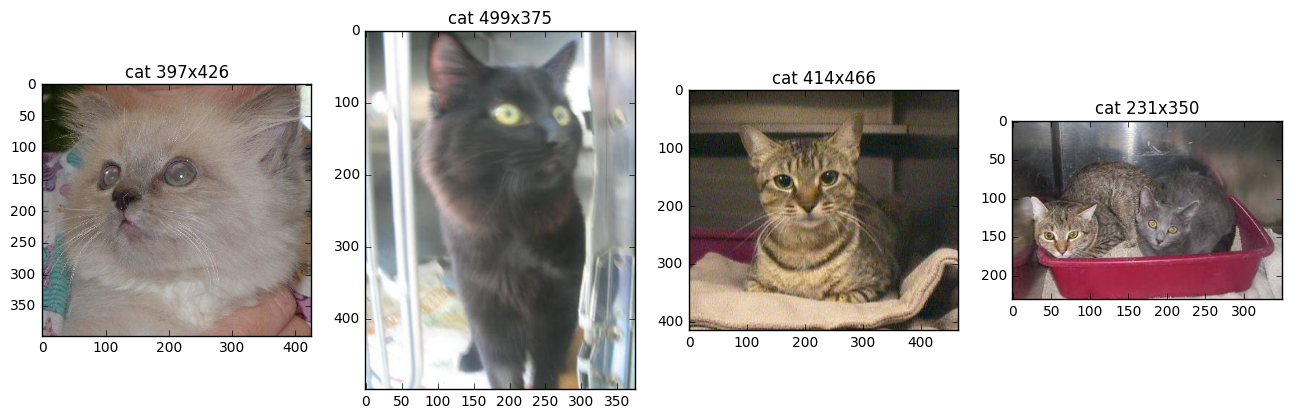

In [51]:
figsize(16,8)

for i in range(4):
    plt.subplot(1,4,i+1)
    im = plt.imread(cat_files[i])
    plt.title('cat %dx%d' % (im.shape[0], im.shape[1]))
    plt.imshow(im)

### Собачки

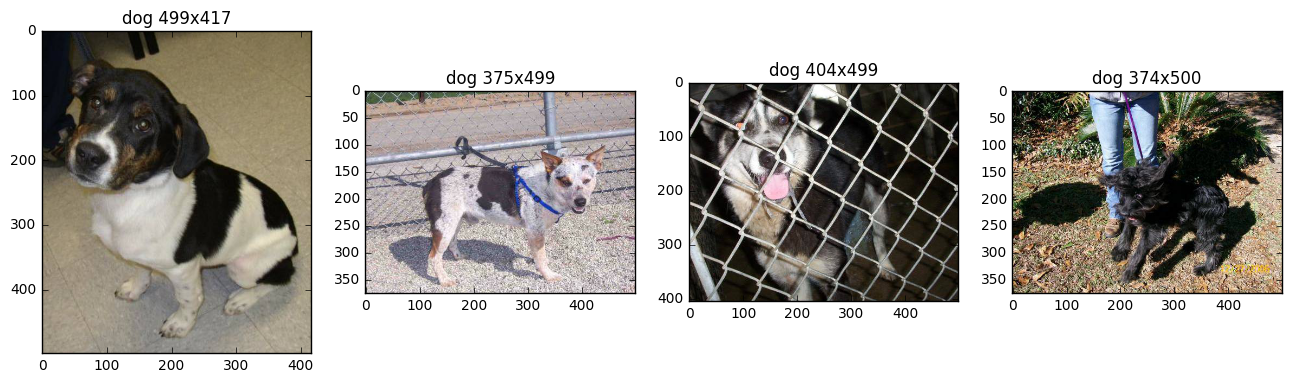

In [52]:
figsize(16,8)

for i in range(4):
    plt.subplot(1,4,i+1)
    im = plt.imread(dog_files[i])
    plt.title('dog %dx%d' % (im.shape[0], im.shape[1]))
    plt.imshow(im)

In [53]:
def process_image(im):
    result_w = 224
    h, w, _ = im.shape
    if h < w:
        im = skimage.transform.resize(im, (result_w, w*result_w/h), preserve_range=True)
    else:
        im = skimage.transform.resize(im, (h*result_w/w, result_w), preserve_range=True)

    # Central crop
    h, w, _ = im.shape
    im = im[h//2-result_w//2:h//2+result_w//2, w//2-result_w//2:w//2+result_w//2, :]
    return im

### Стандартизируем наши картинки

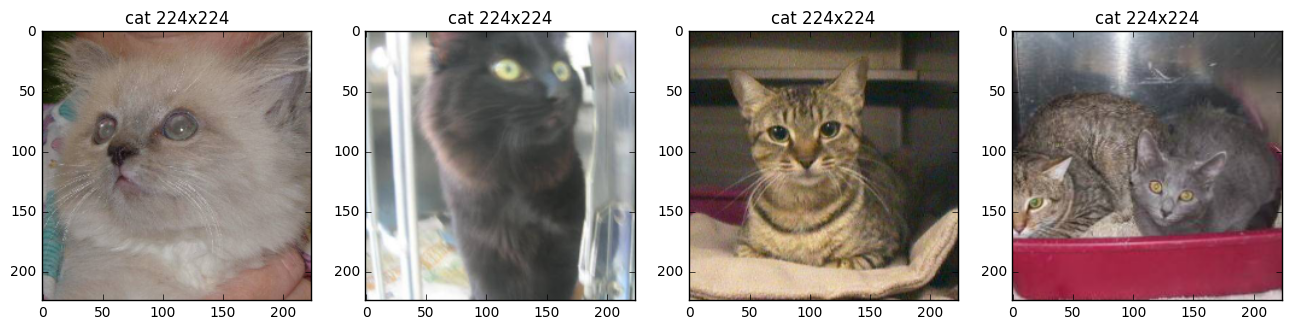

In [54]:
figsize(16,8)

for i in range(4):
    plt.subplot(1,4,i+1)
    im = process_image(plt.imread(cat_files[i]))/255.0
    plt.title('cat %dx%d' % (im.shape[0], im.shape[1]))
    plt.imshow(im)

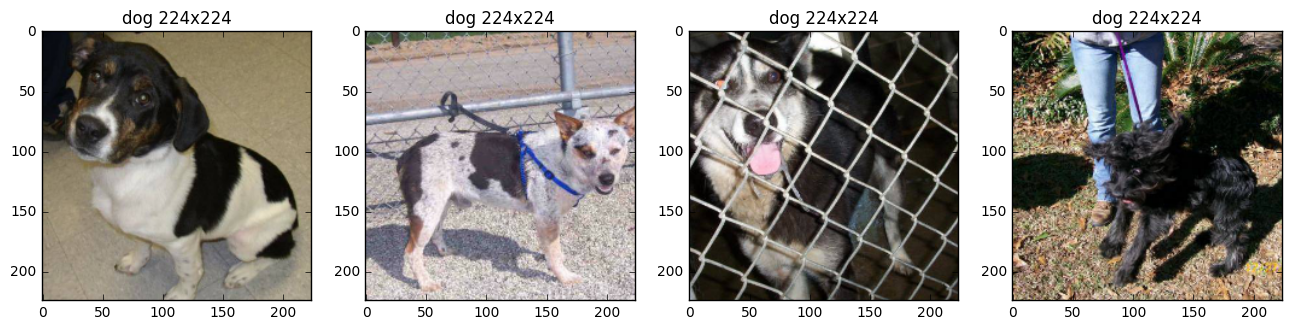

In [55]:
figsize(16,8)

for i in range(4):
    plt.subplot(1,4,i+1)
    im = process_image(plt.imread(dog_files[i]))/255.0
    plt.title('dog %dx%d' % (im.shape[0], im.shape[1]))
    plt.imshow(im)

Скачаем веса VGG19

In [58]:
!wget https://s3.amazonaws.com/lasagne/recipes/pretrained/imagenet/vgg19.pkl

--2016-11-22 01:34:48--  https://s3.amazonaws.com/lasagne/recipes/pretrained/imagenet/vgg19.pkl
Resolving s3.amazonaws.com (s3.amazonaws.com)... 64:ff9b::36e7:48ea
Connecting to s3.amazonaws.com (s3.amazonaws.com)|64:ff9b::36e7:48ea|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 574698691 (548M) [binary/octet-stream]
Saving to: ‘vgg19.pkl’

100%[======================================>] 574,698,691 8.35MB/s   in 2m 46s 

2016-11-22 01:37:35 (3.30 MB/s) - ‘vgg19.pkl’ saved [574698691/574698691]



Архитектура VGG19 реализована в файле VGG19.py, там же лежит функция, которая наливает веса в сеть.

In [59]:
import VGG19

In [60]:
import tensorflow as tf
import pickle

загружаем пикленые веса

In [61]:
with open('vgg19.pkl', 'r') as thefile:
    weights = pickle.loads(thefile.read())

строим вычислительный граф, который в точности повторяет VGG19

In [62]:
tf.reset_default_graph()
with tf.device('/gpu:1') as device:
    images = tf.placeholder(dtype=tf.float32, shape=[None, 3, 224, 224])
    preds = VGG19.inference(images)
    assign_ops = VGG19.assign_weights(preds.graph.get_collection('trainable_variables'), weights['param values'])
    init = tf.initialize_all_variables()

можем посмотреть на кол-во параметров в нашей сети

In [63]:
i = 0
for v in preds.graph.get_collection('trainable_variables'):
    print i, v.name, map(lambda i: i.value, v.get_shape())
    i += 1

0 conv1_1/kernel:0 [3, 3, 3, 64]
1 conv1_1/biases:0 [64]
2 conv1_2/kernel:0 [3, 3, 64, 64]
3 conv1_2/biases:0 [64]
4 conv2_1/kernel:0 [3, 3, 64, 128]
5 conv2_1/biases:0 [128]
6 conv2_2/kernel:0 [3, 3, 128, 128]
7 conv2_2/biases:0 [128]
8 conv3_1/kernel:0 [3, 3, 128, 256]
9 conv3_1/biases:0 [256]
10 conv3_2/kernel:0 [3, 3, 256, 256]
11 conv3_2/biases:0 [256]
12 conv3_3/kernel:0 [3, 3, 256, 256]
13 conv3_3/biases:0 [256]
14 conv3_4/kernel:0 [3, 3, 256, 256]
15 conv3_4/biases:0 [256]
16 conv4_1/kernel:0 [3, 3, 256, 512]
17 conv4_1/biases:0 [512]
18 conv4_2/kernel:0 [3, 3, 512, 512]
19 conv4_2/biases:0 [512]
20 conv4_3/kernel:0 [3, 3, 512, 512]
21 conv4_3/biases:0 [512]
22 conv4_4/kernel:0 [3, 3, 512, 512]
23 conv4_4/biases:0 [512]
24 conv5_1/kernel:0 [3, 3, 512, 512]
25 conv5_1/biases:0 [512]
26 conv5_2/kernel:0 [3, 3, 512, 512]
27 conv5_2/biases:0 [512]
28 conv5_3/kernel:0 [3, 3, 512, 512]
29 conv5_3/biases:0 [512]
30 conv5_4/kernel:0 [3, 3, 512, 512]
31 conv5_4/biases:0 [512]
32 dense6/

подаём данные в нашу сеть порциями (батчами)

In [64]:
def get_batches(X, batch_size):
    ids = np.arange(len(X))
    for i in range(len(ids)/batch_size+1):
        batch_ids = ids[i*batch_size:(i+1)*batch_size]
        yield X[batch_ids]

In [65]:
dogs = np.zeros([2000, 3, 224, 224])
cats = np.zeros([2000, 3, 224, 224])
i = 0
for i in range(2000):
    dogs[i,:,:,:] = VGG19.process_image(plt.imread(dog_files[i]))
    cats[i,:,:,:] = VGG19.process_image(plt.imread(cat_files[i]))

Строим вычислительный граф, который вычисляет признаки для каждого изображения. В качестве признаков берём представление после первого полносвязного слоя.

In [66]:
tf.reset_default_graph()
with tf.device('/gpu:1') as device:
    images = tf.placeholder(dtype=tf.float32, shape=[None, 3, 224, 224])
    features = VGG19.dense6(images)
    assign_ops = VGG19.assign_weights(features.graph.get_collection('trainable_variables'), weights['param values'])
    init = tf.initialize_all_variables()

Прогоняем граф и вычисляем признаки

In [67]:
dogs_features = []
cats_features = []

with tf.Session() as sess:
    sess.run(init)
    sess.run(assign_ops)
    for x_batch in get_batches(dogs, 32):
        dogs_features.append(sess.run(features, {images:x_batch}))
    for x_batch in get_batches(cats, 32):
        cats_features.append(sess.run(features, {images:x_batch}))

Стакаем наши батчи

In [68]:
dogs_features = np.concatenate(dogs_features)
cats_features = np.concatenate(cats_features)

Запустим RF на получившихся признаках

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import roc_auc_score, accuracy_score

In [73]:
X = np.concatenate([dogs_features, cats_features])
Y = np.concatenate([np.zeros(len(dogs_features)),np.ones(len(cats_features))])

In [82]:
ss = ShuffleSplit(len(X), n_iter=5, test_size=0.3)
for train_ids, test_ids in ss:
    rf = RandomForestClassifier(n_estimators=50)
    rf.fit(X[train_ids], Y[train_ids])
    preds = rf.predict(X[test_ids])
    probs = rf.predict_proba(X[test_ids])
    print 'ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(Y[test_ids], probs[:,1]), accuracy_score(Y[test_ids], preds))

ROC-AUC: 0.999, ACC: 0.987
ROC-AUC: 0.999, ACC: 0.986
ROC-AUC: 0.999, ACC: 0.988
ROC-AUC: 1.000, ACC: 0.991
ROC-AUC: 0.999, ACC: 0.991


Почему всё так сложно? Почему не засунуть голые пиксели в Random Forest?

Давайте попробуем

In [83]:
X = np.concatenate([dogs.reshape([len(dogs),-1]), cats.reshape([len(cats),-1])])
Y = np.concatenate([np.zeros(len(dogs)),np.ones(len(cats))])

In [84]:
ss = ShuffleSplit(len(X), n_iter=5, test_size=0.3)
for train_ids, test_ids in ss:
    rf = RandomForestClassifier(n_estimators=50)
    rf.fit(X[train_ids], Y[train_ids])
    preds = rf.predict(X[test_ids])
    probs = rf.predict_proba(X[test_ids])
    print 'ROC-AUC: %.3f, ACC: %.3f' % (roc_auc_score(Y[test_ids], probs[:,1]), accuracy_score(Y[test_ids], preds))

ROC-AUC: 0.664, ACC: 0.623
ROC-AUC: 0.640, ACC: 0.600
ROC-AUC: 0.672, ACC: 0.627
ROC-AUC: 0.629, ACC: 0.589
ROC-AUC: 0.671, ACC: 0.620
